In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
df=pd.read_csv('netflix_titles.csv')

In [47]:
print(df.info())  # Get data types and missing values
print(df.head())  # Preview the first few rows
print(df.describe())  # Summary statistics for numerical columns
print(df.columns)  # Column names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   

In [48]:
df[['director', 'cast', 'country', 'rating']] = df[['director', 'cast', 'country', 'rating']].fillna('Unknown')


In [49]:
# Identify duplicate rows (including all occurrences)
duplicates_before = df[df.duplicated(keep=False)]

# Print duplicates
print(f"Number of Duplicate Rows Before Removal: {len(duplicates_before)}")
print(duplicates_before)


Number of Duplicate Rows Before Removal: 0
Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


In [50]:
print(df['date_added'].dtype)
print(df['date_added'].head(10))  # Check the first few values

object
0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
5    September 24, 2021
6    September 24, 2021
7    September 24, 2021
8    September 24, 2021
9    September 24, 2021
Name: date_added, dtype: object


In [51]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'])
print(df['date_added'].dtype)
print(df['date_added'].head(10))

datetime64[ns]
0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
5   2021-09-24
6   2021-09-24
7   2021-09-24
8   2021-09-24
9   2021-09-24
Name: date_added, dtype: datetime64[ns]


In [52]:
print(df['duration'].dtype)
print(df['duration'].head(10) ) 

object
0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
5     1 Season
6       91 min
7      125 min
8    9 Seasons
9      104 min
Name: duration, dtype: object


In [54]:
import pandas as pd

def convert_movie_duration(row):
    if row['type'] == 'Movie' and isinstance(row['duration'], str):
        try:
            return int(row['duration'].replace(' min', ''))
        except ValueError:
            return row['duration'] #Keep the original value if it can't be converted.
    else:
        return row['duration']

df['duration'] = df.apply(convert_movie_duration, axis=1)
print(df['duration'].head(10))

0           90
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
5     1 Season
6           91
7          125
8    9 Seasons
9          104
Name: duration, dtype: object


In [55]:
def convert_tv_show_duration(row):
    if row['type'] == 'TV Show' and isinstance(row['duration'], str):
        try:
            return int(row['duration'].split()[0])
        except ValueError:
            return row['duration']  # Keep the original value if it can't be converted
    else:
        return row['duration']

df['duration'] = df.apply(convert_tv_show_duration, axis=1)
print(df['duration'].head(10))

0     90.0
1      2.0
2      1.0
3      1.0
4      2.0
5      1.0
6     91.0
7    125.0
8      9.0
9    104.0
Name: duration, dtype: float64


<Axes: xlabel='type'>

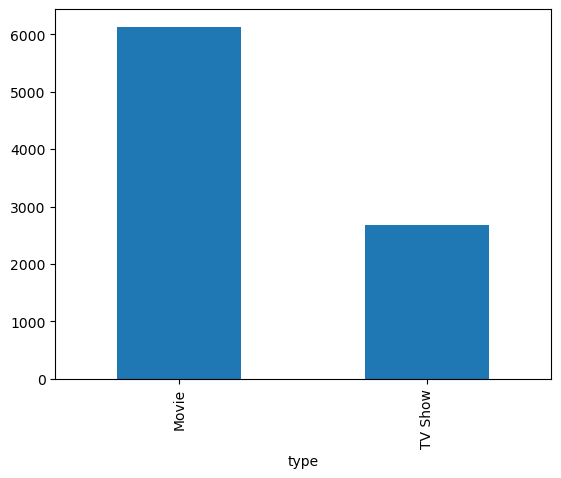

In [53]:
df['type'].value_counts().plot(kind='bar')

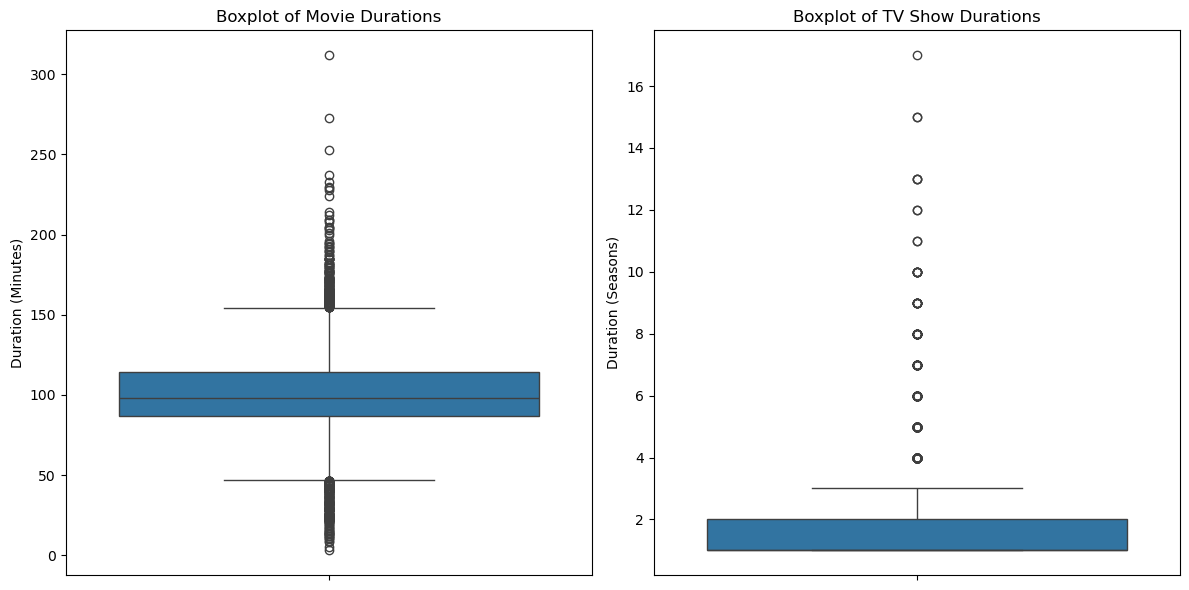

In [56]:
# Ensure 'duration' is numeric
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# Separate Movies and TV Shows
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

# Create a figure with 2 subplots
plt.figure(figsize=(12, 6))

# Boxplot for Movies (Duration in Minutes)
plt.subplot(1, 2, 1)
sns.boxplot(y=movies_df['duration'])
plt.title('Boxplot of Movie Durations')
plt.ylabel('Duration (Minutes)')

# Boxplot for TV Shows (Duration in Seasons)
plt.subplot(1, 2, 2)
sns.boxplot(y=tv_shows_df['duration'])
plt.title('Boxplot of TV Show Durations')
plt.ylabel('Duration (Seasons)')

# Show plots
plt.tight_layout()
plt.show()


In [57]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)], len(df) - len(df[(df[column] >= lower_bound) & (df[column] <= upper_bound)])

# Before removal
num_movies_before = len(movies_df)

# Remove outliers for movies
movies_df_cleaned, outliers_removed = remove_outliers_iqr(movies_df, 'duration')

# After removal
num_movies_after = len(movies_df_cleaned)

# Display results
print(f"Number of movies before outlier removal: {num_movies_before}")
print(f"Number of outliers removed: {outliers_removed}")
print(f"Number of movies after outlier removal: {num_movies_after}")


Number of movies before outlier removal: 6131
Number of outliers removed: 453
Number of movies after outlier removal: 5678


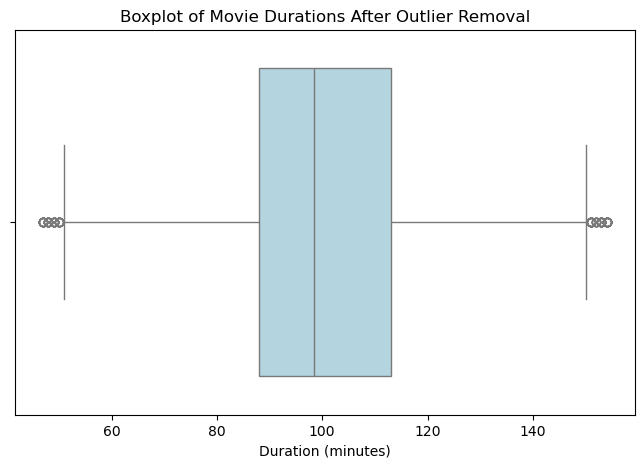

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplot for cleaned movie durations
plt.figure(figsize=(8, 5))
sns.boxplot(x=movies_df_cleaned['duration'], color='lightblue')

# Labels and title
plt.xlabel("Duration (minutes)")
plt.title("Boxplot of Movie Durations After Outlier Removal")
plt.show()


In [59]:
# Find mode for all columns (both numerical & categorical)
modes = df.mode().iloc[0]  # mode() returns multiple modes, take first row
print("Modes of Columns:\n", modes)


Modes of Columns:
 show_id                                                        s1
type                                                        Movie
title                                                      #Alive
director                                                  Unknown
cast                                                      Unknown
country                                             United States
date_added                                    2020-01-01 00:00:00
release_year                                               2018.0
rating                                                      TV-MA
duration                                                      1.0
listed_in                            Dramas, International Movies
description     Paranormal activity at a lush, abandoned prope...
Name: 0, dtype: object


In [60]:
# Split the 'listed_in' column by commas and explode the list into separate rows
df_exploded = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

# Group by 'country', 'type', and 'listed_in' and count the occurrences
frequencies = df_exploded.groupby(['country', 'type', 'listed_in']).size().reset_index(name='count')

# Display the frequencies
print(frequencies.sort_values(by='count', ascending=False))

                country     type                 listed_in  count
987               India    Movie      International Movies    817
983               India    Movie                    Dramas    620
2466      United States    Movie                    Dramas    591
2463      United States    Movie                  Comedies    524
2465      United States    Movie             Documentaries    411
...                 ...      ...                       ...    ...
6             Argentina    Movie  Children & Family Movies      1
4         , South Korea  TV Show                 TV Dramas      1
3         , South Korea  TV Show    International TV Shows      1
2     , France, Algeria    Movie      International Movies      1
1     , France, Algeria    Movie        Independent Movies      1

[3019 rows x 4 columns]


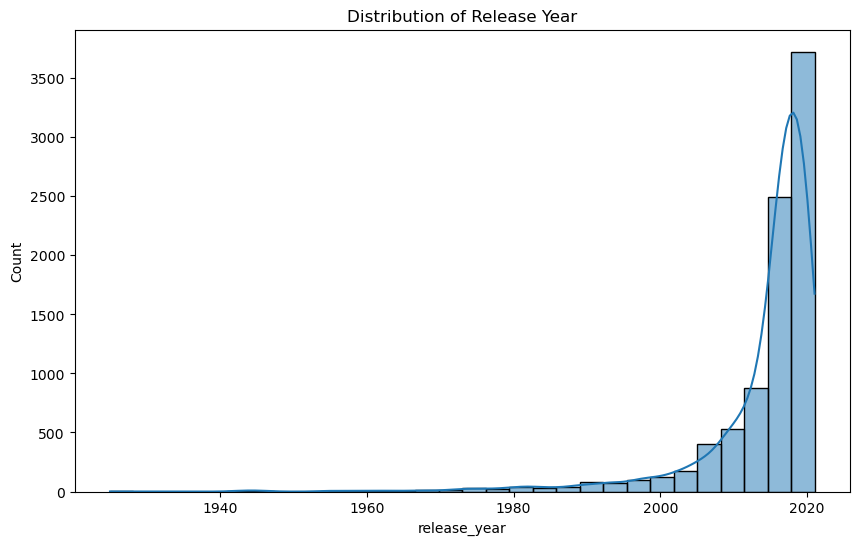

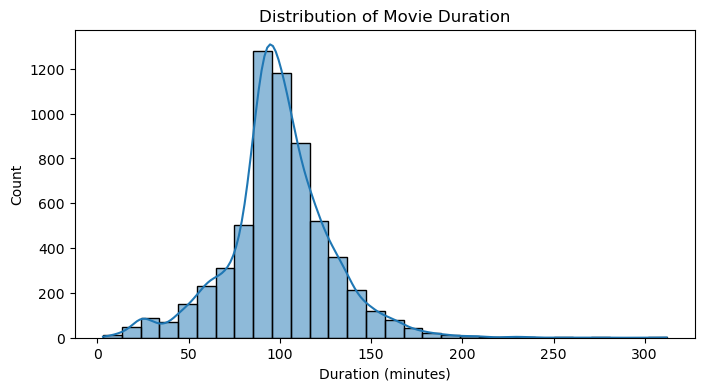

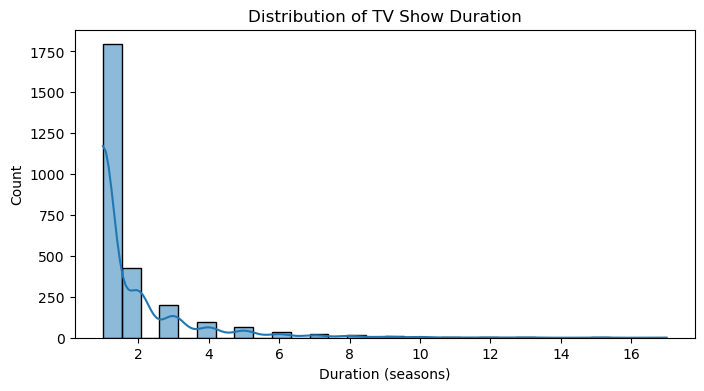

In [61]:
# Plot distribution of release_year and count
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], kde=True, bins=30)
plt.title("Distribution of Release Year")
# Plot distribution of duration for Movies
plt.figure(figsize=(8, 4))
sns.histplot(movies_df['duration'], kde=True, bins=30)
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.show()

# Plot distribution of duration for TV Shows
plt.figure(figsize=(8, 4))
sns.histplot(tv_shows_df['duration'], kde=True, bins=30)
plt.title("Distribution of TV Show Duration")
plt.xlabel("Duration (seasons)")
plt.show()

In [62]:
# Check missing values percentage
missing_values = df.isnull().sum() / len(df) * 100
print("Missing Values (%):\n", missing_values[missing_values > 0])


Missing Values (%):
 date_added    0.113546
duration      0.034064
dtype: float64


<Axes: xlabel='Genre'>

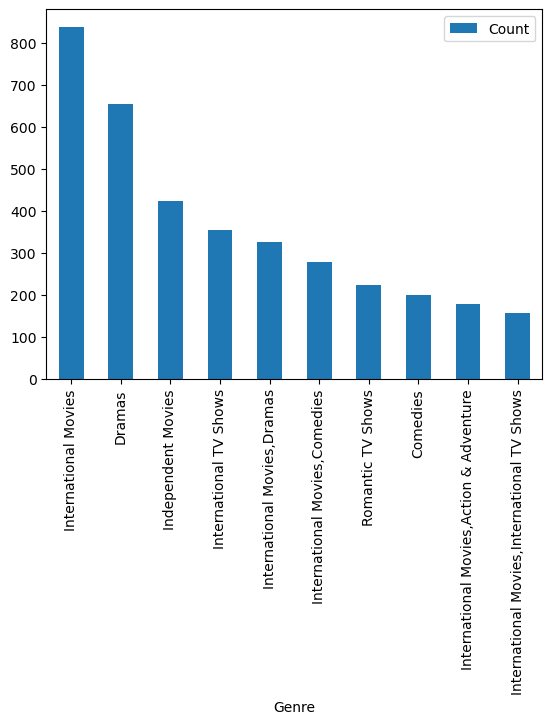

In [63]:
from collections import Counter
genres = Counter(','.join(df['listed_in'].dropna()).split(', '))
genres_df = pd.DataFrame(genres.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
genres_df.head(10).plot(x='Genre', y='Count', kind='bar')

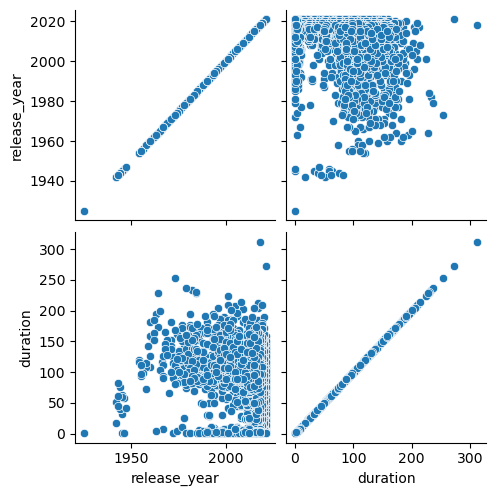

In [64]:
num_columns = df.select_dtypes(include=['number']).columns
sns.pairplot(df[num_columns], diag_kind=None)  
plt.show()

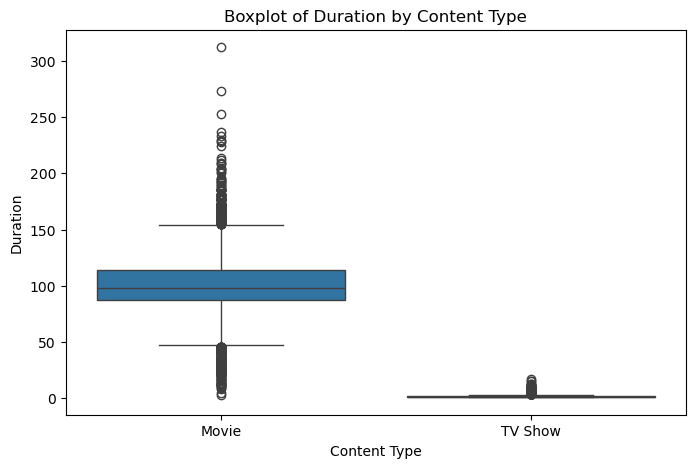

In [67]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['type'], y=df['duration'])
plt.title('Boxplot of Duration by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.show()

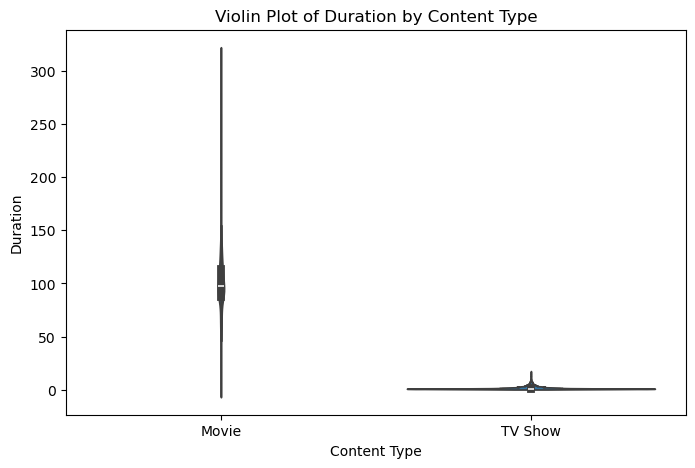

In [68]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df['type'], y=df['duration'])
plt.title('Violin Plot of Duration by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.show()

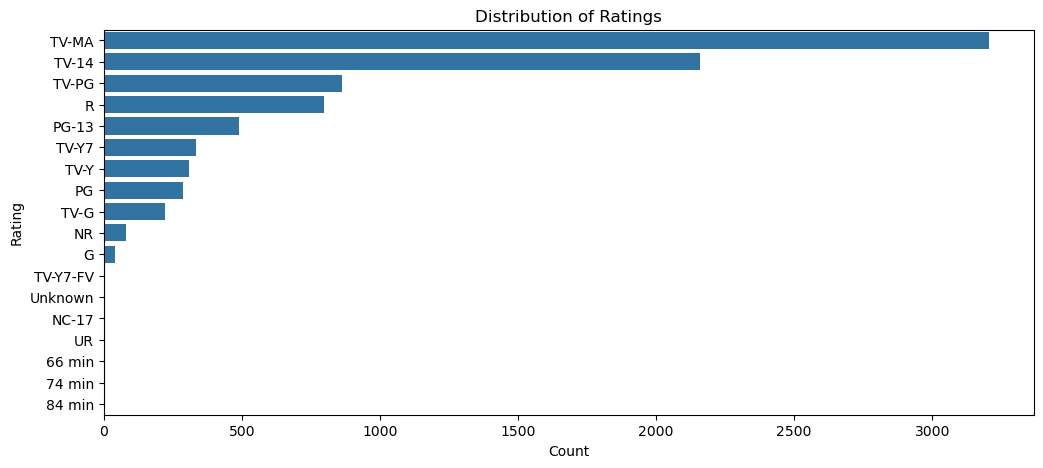

In [69]:
plt.figure(figsize=(12, 5))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'TV-MA'),
  Text(2, 0, 'PG'),
  Text(3, 0, 'TV-14'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'TV-Y7'),
  Text(7, 0, 'R'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'G'),
  Text(10, 0, 'NC-17'),
  Text(11, 0, '74 min'),
  Text(12, 0, '84 min'),
  Text(13, 0, '66 min'),
  Text(14, 0, 'NR'),
  Text(15, 0, 'Unknown'),
  Text(16, 0, 'TV-Y7-FV'),
  Text(17, 0, 'UR')])

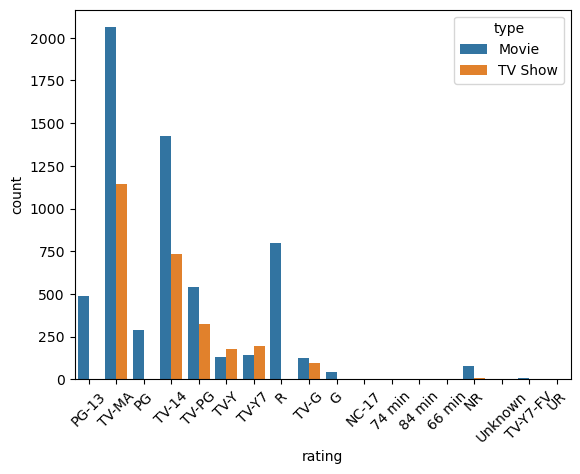

In [65]:
sns.countplot(x='rating', hue='type', data=df)
plt.xticks(rotation=45)

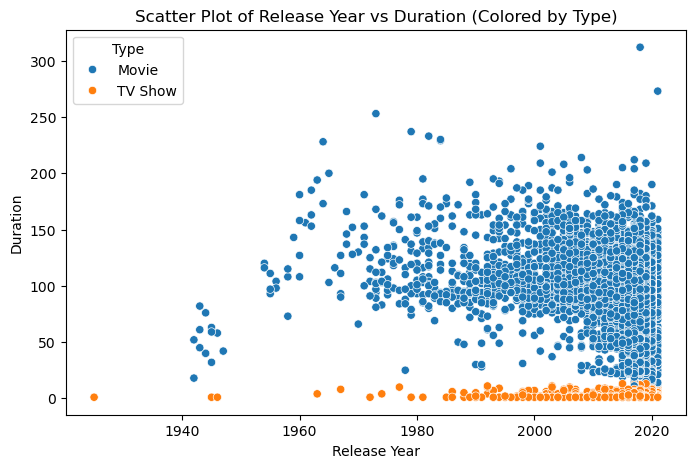

In [70]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['release_year'], y=df['duration'], hue=df['type'])
plt.title('Scatter Plot of Release Year vs Duration (Colored by Type)')
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.legend(title="Type")
plt.show()

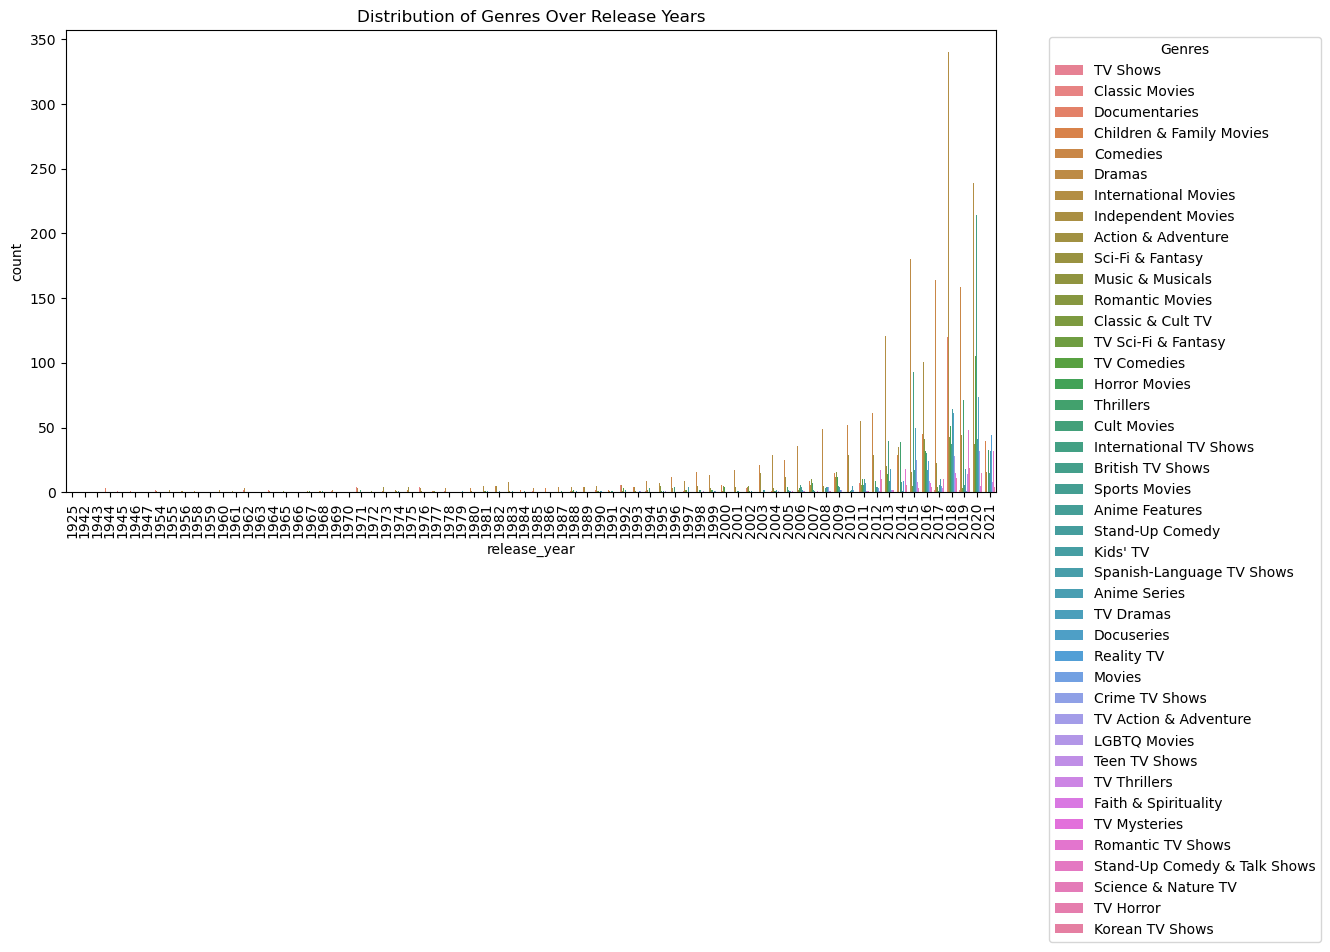

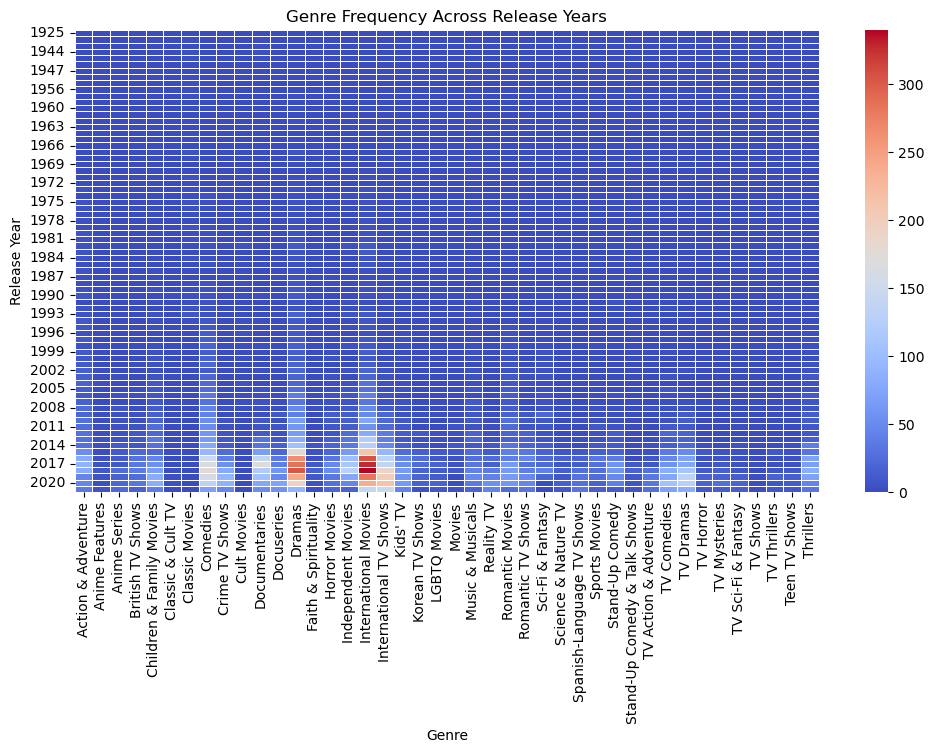

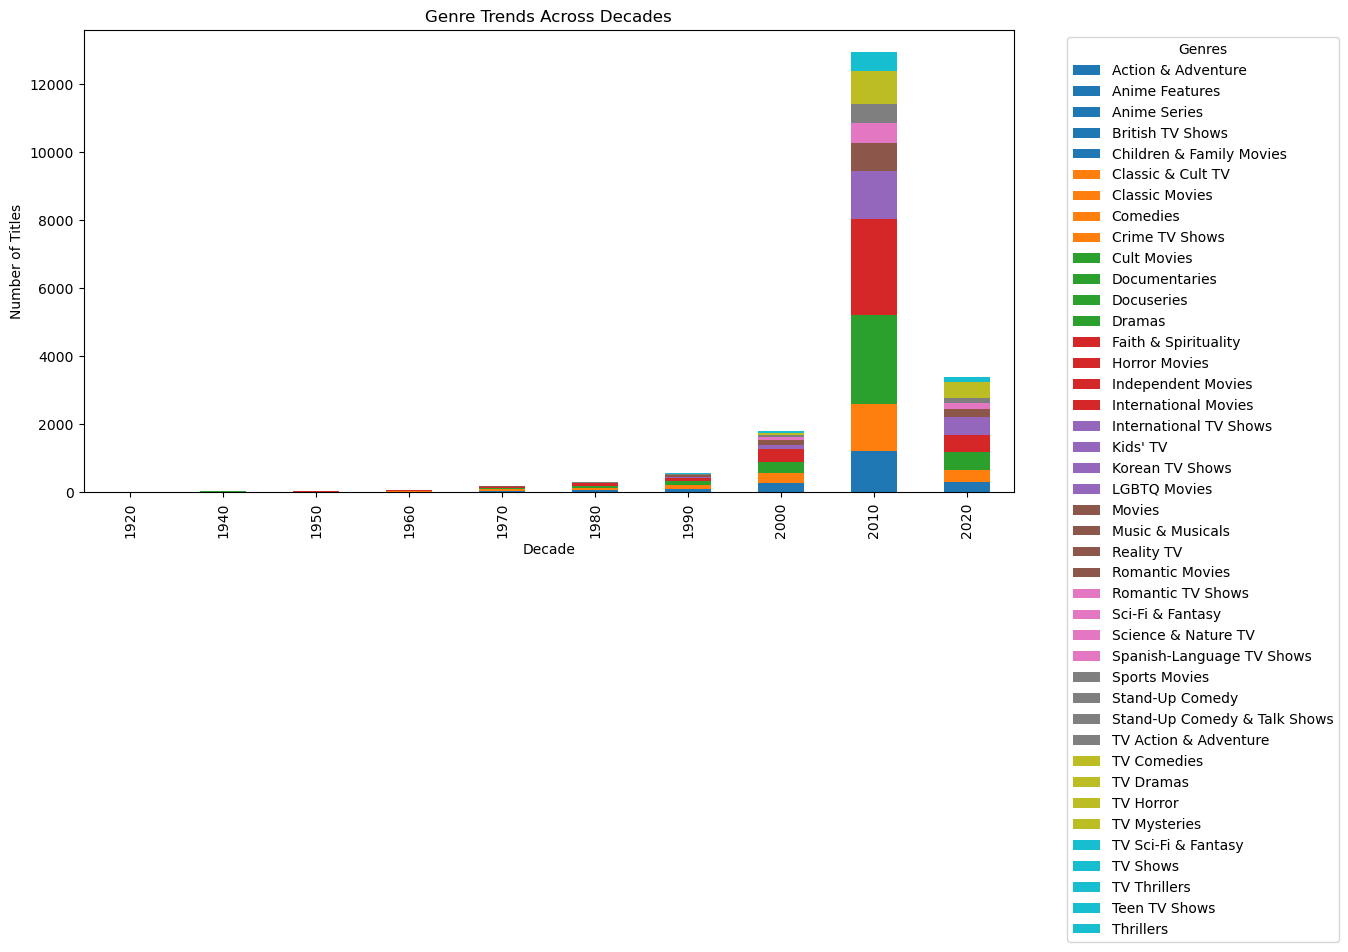

In [66]:
# Ensure 'release_year' is numeric
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Split 'listed_in' column into multiple categories
df_exploded = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

# Count Plot - Top genres over time
plt.figure(figsize=(12, 6))
sns.countplot(data=df_exploded, x='release_year', hue='listed_in', order=sorted(df_exploded['release_year'].unique()))
plt.xticks(rotation=90)
plt.title("Distribution of Genres Over Release Years")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Heatmap of genres per release year
plt.figure(figsize=(12, 6))
genre_year_counts = df_exploded.groupby(['release_year', 'listed_in']).size().unstack(fill_value=0)
sns.heatmap(genre_year_counts, cmap='coolwarm', linewidths=0.5)
plt.title("Genre Frequency Across Release Years")
plt.xlabel("Genre")
plt.ylabel("Release Year")
plt.show()

# Group by decade for summarized analysis
df_exploded['decade'] = (df_exploded['release_year'] // 10) * 10
genre_decade_counts = df_exploded.groupby(['decade', 'listed_in']).size().unstack(fill_value=0)

# Plot stacked bar chart for genre trends across decades
genre_decade_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title("Genre Trends Across Decades")
plt.xlabel("Decade")
plt.ylabel("Number of Titles")
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
